# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Хамидов Максуд, вариант 15.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Обыкновенные дифференциальные уравнения (ОДУ) — это уравнения, зависящие от одной независимой переменной, имеющие вид

$$ f(x, y, y', y'', \dots, y^{(n)}) = 0, $$ где $x$ - независимая переменная.

Общим решением ОДУ является множество таких функций $y$, что $ f(x, y, y', y'', \dots, y^{(n)}) = 0 $ для $\forall{x}$.

Задача Коши подразумевает поиск частного решения из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:

\begin{cases}
    f(x, y, y', y'', \dots, y^{(n)}) = 0 \\
    y(x_0) = y_0 \\
    y'(x_0) = y_1 \\
    y''(x_0) = y_2 \\
    \dots \\
    y^{(n-1)}(x_0) = y_{n-1}
\end{cases}

В рамках данной работы рассматривается дифференциальное уравнение второго порядка:

### $\displaystyle{y''=f(x,y)}$

Данное уравнение можно свести к системе уравнений первого порядка:

### $\begin{cases}
    y' = v \\
    v' = f(x,y) \\
\end{cases}$ $\displaystyle{\Longrightarrow}$ $\begin{cases}
    \frac{dy}{dx} = v \\
    \frac{dv}{dx} = f(x,y) \\
\end{cases}$ $\displaystyle{\Longrightarrow}$ $\displaystyle{\frac{d}{dx}}\left(
    \begin{array}{c}
      y \\
      v
    \end{array}
  \right) = \left(
    \begin{array}{c}
      v \\
      f(x,y)
    \end{array}
  \right)$
  
Таким образом имеем массив решений $\left(
    \begin{array}{c}
      y \\
      v
    \end{array}
  \right)$ и массив функций $\left(
    \begin{array}{c}
      v \\
      f(x,y)
    \end{array}
  \right)$ ,состоящие из двух элементов (массив функций можно представить как функцию, принимающую вектор значений и возвращающую соответствующий вектор результатов).

## Постановка задачи

###### Дано дифференциальное уравнение:
### $\displaystyle{y''=f(x, y), a<x<b}$      (1)
###### и граничные условия:
### $\displaystyle{y(a)=y_a,y(b)=y_b}$      (2)
###### Требуется найти решение задачи (1)-(2) и построить его график.
###### Рассмотрим задачу Коши для уравнения (1) с начальными условиями:
### $\displaystyle{y(a) = y_a, y'(a) = h}$    (3)
###### План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $\displaystyle{x=b}$ является функцией от $\displaystyle{h}$. Задача сводится к отысканию такого значения переменной $\displaystyle{h}$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться:
### $\displaystyle{y(b,h)=y_b}$    (4)

###### Это уравнение с одним неизвестным $\displaystyle{h}$. Для его решения можно применить стандартный метод половинного деления.

## Схема решения

1. Задаем наугад число $h_0$, решаем задачу Коши. Далее вычисляем $y(b, h_0)$.
Если оказалось, что $y(b, h_0) = y_b$, то мы решили краевую задачу. Иначе рассматривается частный случай: $y(b, h_0) > y_b$.


2. Выберем шаг $\Delta{h}$ и решаем несколько раз задачу Коши при $h_1 = h_0 + \Delta{h}$.
Если снова получили $y(b, h_1) > y_b$, причём $y(b, h_0) > y(b, h_1) > y_b$, решаем задачу Коши при $h_2 = h_1 + \Delta{h}$ и т.д.
Процесс повторяется пока не получим неравенство $y(b, h_m) < y_b$.
Это означает, что искомое значение попало в «вилку», т.е. $h \in (h_{m−1}; h_m)$.
Шаг $\Delta{h}$ не должен быть слишком маленьким, иначе процесс сильно затянется.
Знак шага также не известен заранее, может оказаться, что нужно не увеличивать наклон, а уменьшать.


3. Далее применяется стандартный процесс половинного деления к уравнению (4).


4. Процесс останавливаем, когда выполнится неравенство $|y(b, h_m) − y(b, h_{m−1})| < 0.001$.


5. Возможен случай, когда ни одна интегральная кривая не проходит через точку $(b, y_b)$, т.е. задача не имеет решения.
Поэтому нужно ограничить число шагов. Процесс останавливается при $m > M$, где $M$ – заданное число (например, 100).

## Выполнение работы

1. Условия:

$\displaystyle{f(x,y)=\frac{2^x}{x^2+y}}$

$a = 0, b = 2$

$y_a = 3, y_b = 4$

2. Подготовка к работе:

*Задача Коши:*

$\begin{cases}
    y'' - \frac{2^x}{x^2+y} = 0 \\
    y(0) = 3 \\
    y'(0) = h
\end{cases}$

*Уравнение второго порядка представим в виде системы уравнений первого порядка (для использования функции odeint() нужна система):*

$\begin{cases}
    y' = v \\
    v' = \displaystyle{\frac{2^x}{x^2+y}} \\
\end{cases}$

*Задаем число $ h_{0}$:*

$h_{0} = -1$


3. Подключение необходимых библиотек:

In [1]:
from pylab import *
from scipy.integrate import *

4. Определение функции отображения результата (найденного значения $h$ и решения краевой задачи при найденном $h$ вместе с графиком):

In [2]:
def displayResult(h, x, solve, y_b):
    plot(x, solve, lw=1.9, c='red')
    xlabel('x')
    ylabel('y')
    grid()
    print("При h = {}, y(b, h) = {} ~=~ {} = y_b с точностью 0.001".format(h, solve[-1], y_b))

5. Определение функции - правой части дифференциального уравнения второго порядка, т. е. функции $f(x, y)$, где вместо $y$ - вектор системы решений y:

In [3]:
def f(v, x):
    y = v[0]
    return [v[1], 2**x / (x**2 + y)]

6. Объявление и определение исходных данных:

In [4]:
a, b = 0, 2 # Граничные значения х
y_a, y_b = 3, 4 # Граничные значения у
h0, dh = -1, 1.5 # Начальные h0 и шаг
M = 100 # Количество итераций на подьем и спуск для поиска решения

7. Решение краевой задачи (алгоритм):

y(b, h0) = 2.041563462379547 < 4 = y_b
Нашли вилку: h in [-1.0, 0.5]
При h = 0.072998046875, y(b, h) = 3.9993562072352407 ~=~ 4 = y_b с точностью 0.001


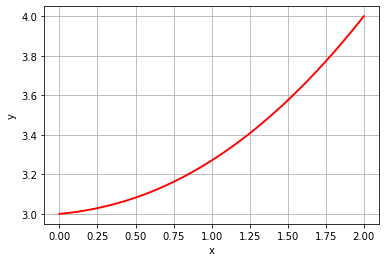

In [5]:
x = linspace(a, b, 10000) # Генерация дискретного промежутка x[a, b]

solve = odeint(f, [y_a, h0], x)[: ,0] # Решение задачи Коши относительно h0
y_b_h = solve[-1] # Решение задачи коши в точке b

if abs(y_b_h - y_b) >= 0.001: # Если при h0 краевая задача еще не решена
    
    if y_b < y_b_h: # Оптимизация: выбор подъема или спуска в зависимости от приближения y_b_h к y_b или оттдаления
        print("y(b, h0) = {} > {} = y_b".format(y_b_h, y_b))
        h1 = h0 + dh
        solve = odeint(f, [y_a, h1], x)[: ,0]
        y_b_h1 = solve[-1]
        if y_b_h1 > y_b_h:
            dh = -dh
    else:
        print("y(b, h0) = {} < {} = y_b".format(y_b_h, y_b))
        h1 = h0 + dh
        solve = odeint(f, [y_a, h1], x)[: ,0]
        y_b_h1 = solve[-1]
        if y_b_h1 < y_b_h:
            dh = -dh
    
    sign_0 = sign(y_b - y_b_h) # Вычисление знака относительности решения при h0 и требуемого y_b
    h_left, h_right = None, None
    for direct in (1, -1): # Производим обход в два направления: сначала спуск, потом подъем (или наоборот)
        h = h0
        dh *= direct
        for i in range(M): # Итерации (ограниченны числом М)
            h += dh # Увеличение h на величину шага
            solve = odeint(f, [y_a, h], x)[: ,0] # Очередное новое решение задачи Коши
            y_b_h = solve[-1] # В точке b
            if sign(y_b - y_b_h) != sign_0: # Как только знак относительности решения при h0 и требуемого y_b поменяется
                h_left = h - dh # Нашли вилку, останавливаем обход
                h_right = h
                print("Нашли вилку: h in [{}, {}]".format(h_left, h_right))
                break
        if h_left != None: # Выходим из всех циклов
            break
        
        print("Прошли на {} итераций {}, знак по-прежнему не изменился:".format(M, {-1: "влево", 1: "вправо",}[sign(dh)]))
        if sign_0 > 0:
            print("y(b, h) = {} < {} = y_b".format(y_b_h, y_b))
        else:
            print("y(b, h) = {} > {} = y_b".format(y_b_h, y_b))
    
    if h_left == None: # Если вилка не была найдена, решений нет
        print("\n\033[1mНет решений\n\033[0m")
    else: # Иначе методом половинного деления находим корень с точностью до 0.001
        solveLeft = odeint(f, [y_a, h_left], x)[: ,0] # Находим решение для левой границы отрезка
        solveRight = solve # Решение для правой границы отрезка
        
        while abs(solveRight[-1] - solveLeft[-1]) >= 0.001: # Пока длиннаотрезка не принизит точность
            
            mid = (h_left + h_right) / 2 # считаем среднюю точку отрезка
            solveMid = odeint(f, [y_a, mid], x)[: ,0] # Решение для средней точки
            
            if sign(y_b - solveMid[-1]) == sign_0: # Проверяем, поменялся ли знак решения в точке b для средней точки
                h_left = mid # Если нет, то он поменяется во второй половине отрезка => пододвигаем левую границу к середине
                solveLeft = solveMid
            else: # Если да, то решение уже миновало (в первой половине отрезка) => пододвигаем правую границу к середине
                h_right = mid
                solveRight = solveMid
    
        displayResult(h_left, x, solveLeft, y_b)

else:
    print("y(b, h0) = {} ~=~ {} = y_b с точностью 0.001".format(y_b_h, y_b))
    displayResult(h0, x, solve, y_b)

## Анализ результатов
Были получены следующие результаты:
- $ h = 0.072998046875 $
- $ f(b, h) = 3.9993562072352407 \approx 4 = y_b$

Значение $h$ было найдено с точностью до $0.001$.

**Данные результаты являются решением поставленнной краевой задачи.**

## Выводы

**В ходе выполнения практической работы была решена краевая задача для уравнения 2-ого порядка путём многократного решения задачи Коши с использованием методов численного интегрирования с определенной точностью; Были приобретены навыки в применении дифференциальных уравнений в различных областях.**